# Plot notebook
This notebook produces the plots for the hyper-parameter optimization.

In [ ]:
from utils import visualize_history

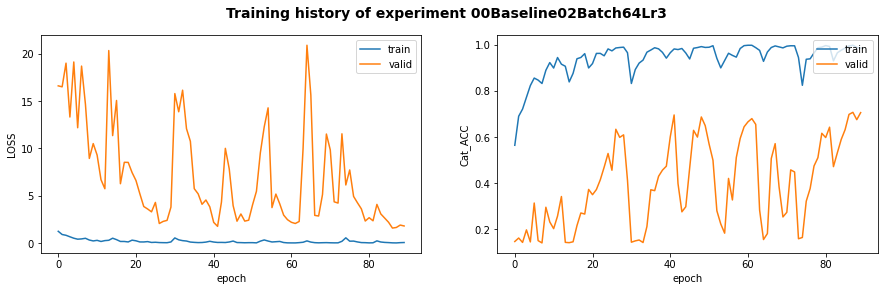

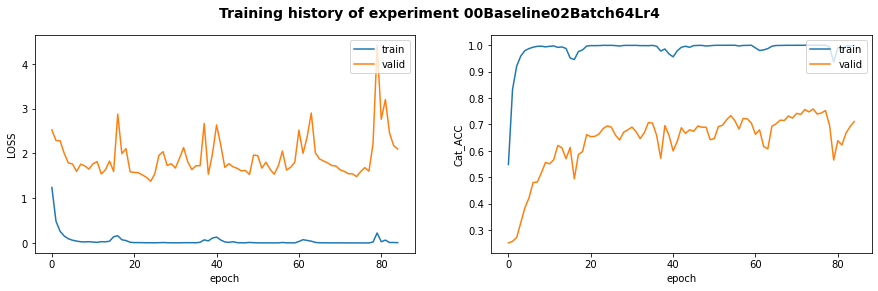

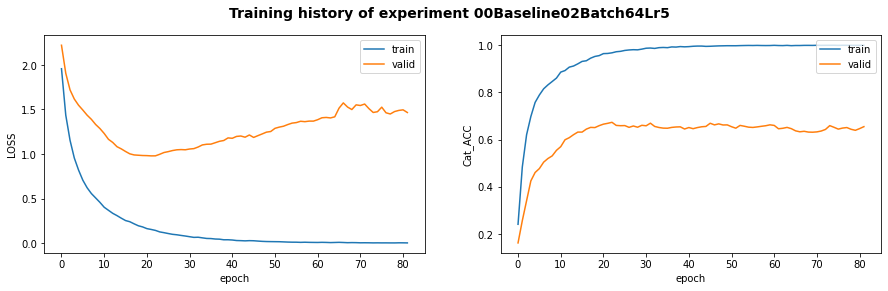

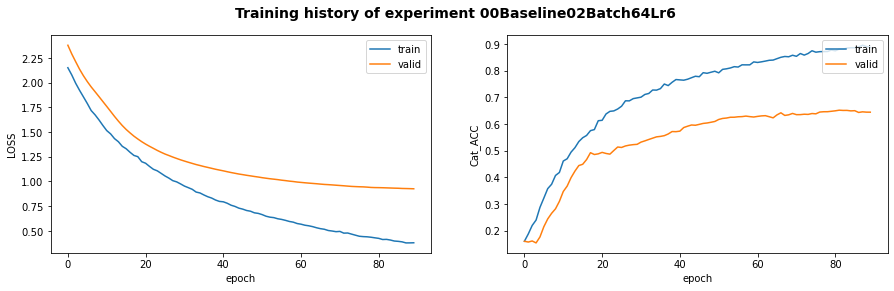

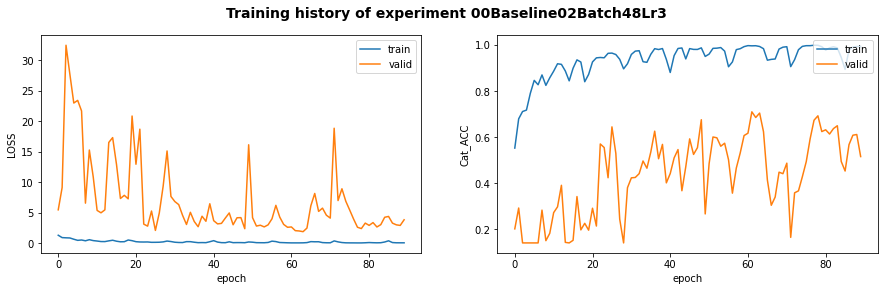

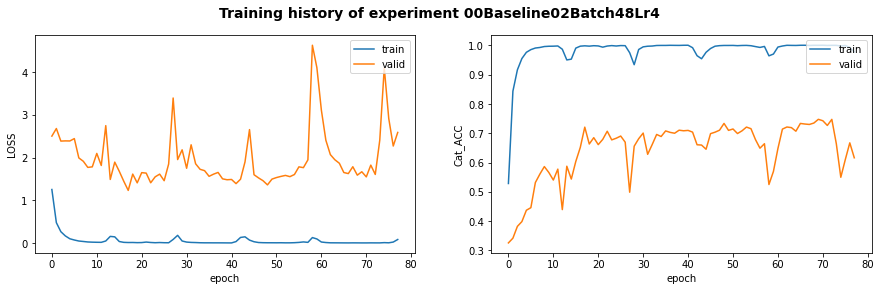

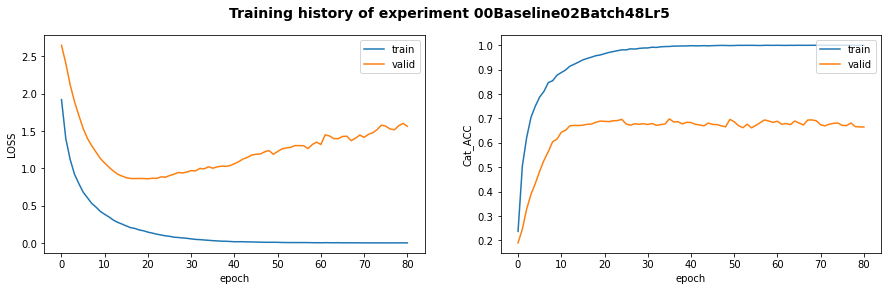

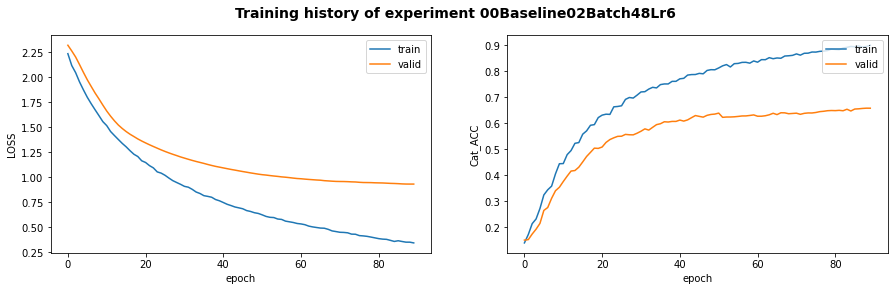

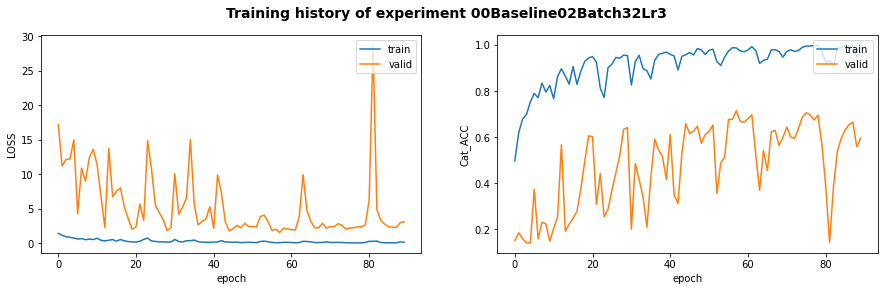

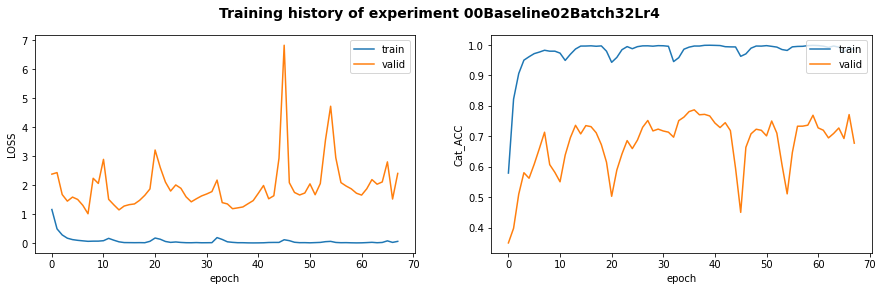

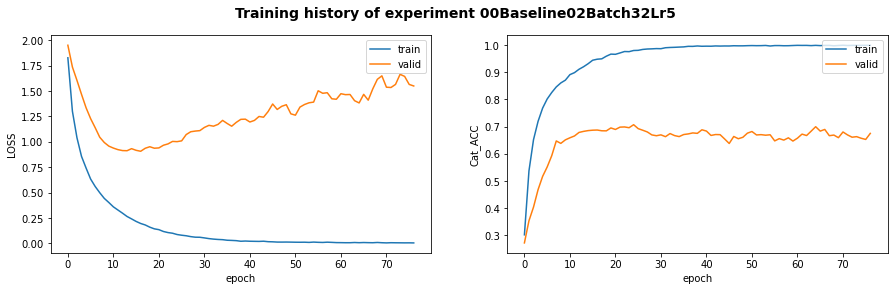

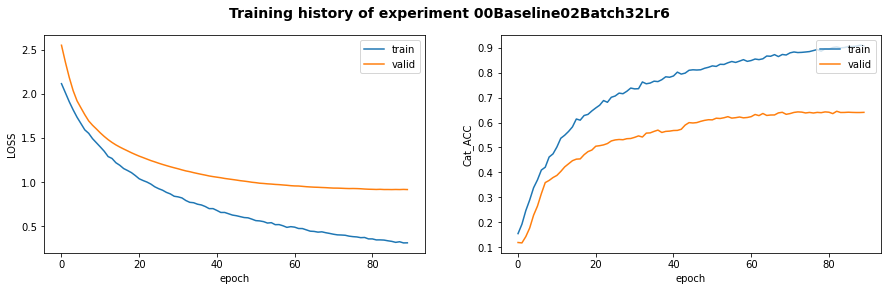

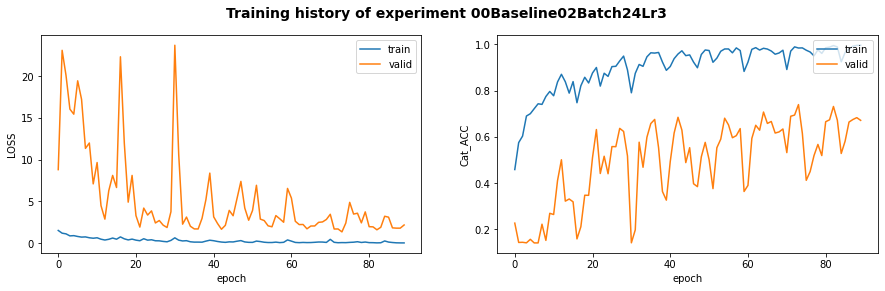

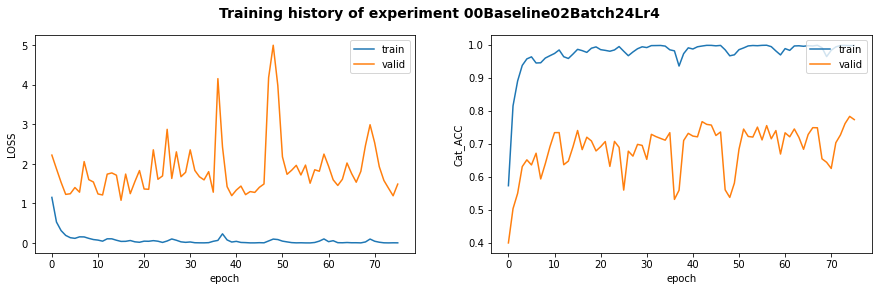

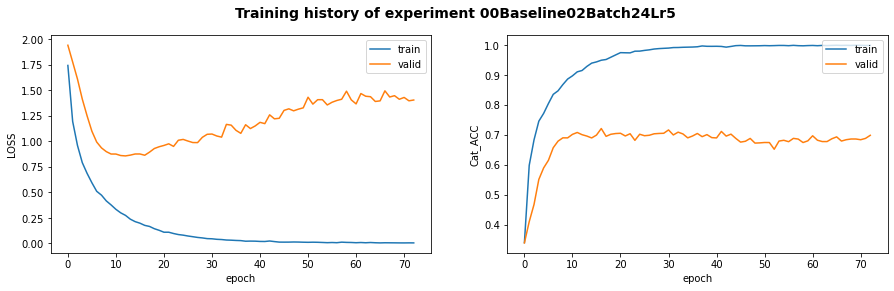

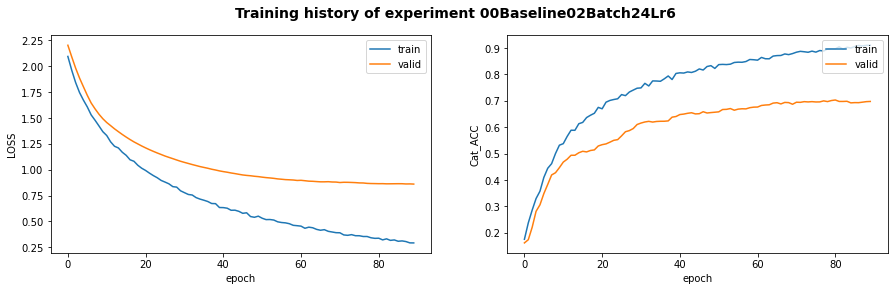

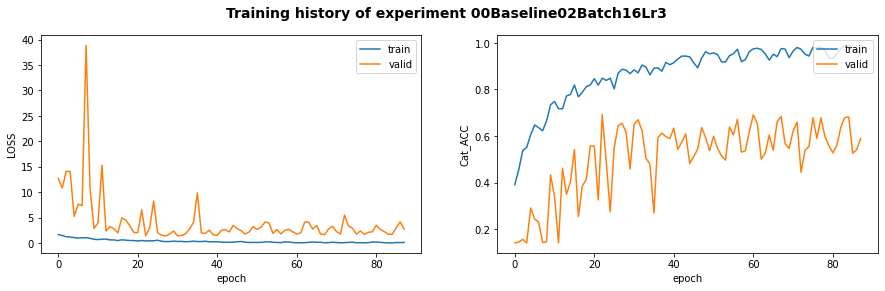

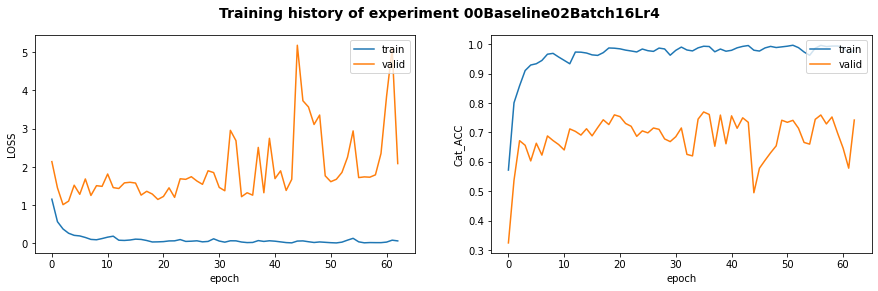

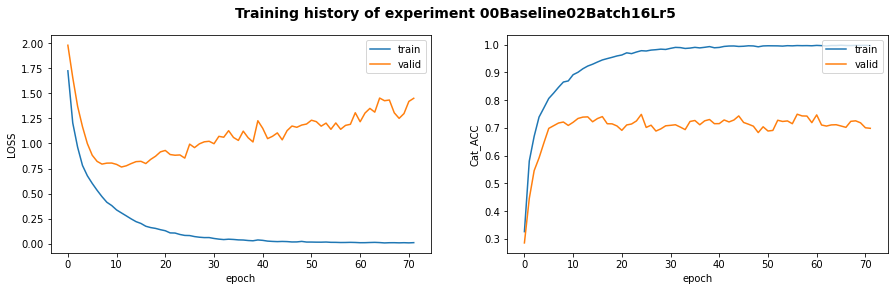

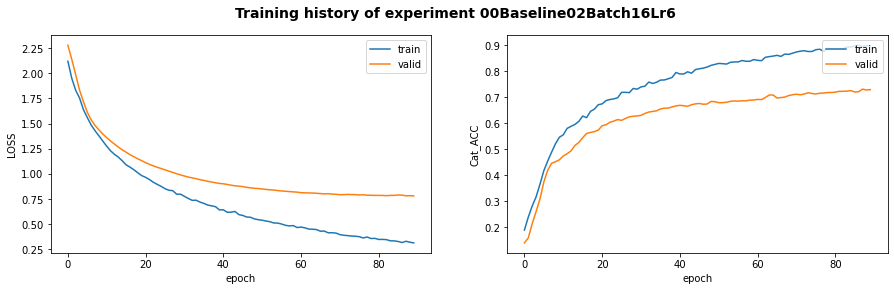

In [2]:
batch_sizes = [64,48,32,24,16]
exponents = [3,4,5,6]
for batch_size in batch_sizes:
    for exponent in exponents:
        lr=10**(-exponent)
        exp_name=f"00Baseline02Batch{batch_size}Lr{exponent}"
        visualize_history(exp_name)

In [ ]:
MODEL_PATH = "./models/"
batch_size=32
import tensorflow as tf
import numpy as np
from utils import create_dataset,prepare_df,parse_function

TRAINING_PATH = "./data/ISIC2018/ISIC2018_Task3_Training_Input/"

df_train = prepare_df(TRAINING_PATH)

from sklearn.model_selection import train_test_split
idx_train, idx_valid = train_test_split(df_train.index,stratify=df_train["lesion"],test_size=0.20,random_state=42,shuffle=True)

df_valid = df_train.loc[idx_valid,:]

batch_sizes = [64,48,32,24,16]
exponents = [3,4,5,6]
losses = np.zeros((len(batch_sizes),len(exponents)))
metrics = np.zeros((len(batch_sizes),len(exponents)))

for i in range(len(batch_sizes)):
    for j in range(len(exponents)):
        batch_size = batch_sizes[i]
        exponent = exponents[j]
        lr=10**(-exponent)
        exp_name=f"00Baseline02Batch{batch_size}Lr{exponent}"
        valid_data = create_dataset(df_valid,TRAINING_PATH).batch(batch_size)
        print(exp_name)
        model_path = f'{MODEL_PATH}best_model_{exp_name}.h5'
        predictive_model = tf.keras.models.load_model(model_path)
        evaluation = predictive_model.evaluate(valid_data)
        print(evaluation)
        losses[i,j] = evaluation[0]
        metrics[i,j] = evaluation[1]
        

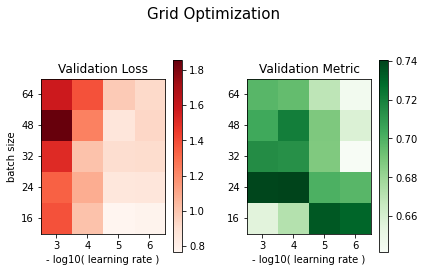

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
fig.suptitle('Grid Optimization',fontsize=15)
fig.tight_layout(pad=2.0)
ax1=axs[0]
ax2=axs[1]
ax1.set_title("Validation Loss",fontsize=12)
ax2.set_title("Validation Metric",fontsize=12)
im1 = ax1.imshow(losses, cmap='Reds', interpolation='nearest')
#fig.colorbar(ax=ax1)
im2 = ax2.imshow(metrics, cmap='Greens', interpolation='nearest')
#fig.colorbar(ax=ax2)

plt.colorbar(im1,ax=ax1)
plt.colorbar(im2,ax=ax2)

ax1.set(xlabel="- log10( learning rate )",ylabel="batch size")
ax2.set(xlabel="- log10( learning rate )")

for ax in axs:
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(batch_sizes)
    ax.set_xticklabels(exponents)
plt.savefig("Grid_Optimization.png", dpi=1200)